## Homework 4 - Numerical 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [2]:
np.random.seed(0)

## Gambler’s ruin at the French Roulette
Consider the scenario where you are gambling 1 at the French Roulette on the Reds. Therefore you gain 1 with probability 18/38 and you lose a dollar with probability 20/38. The goal is to estimate the probability of your fortune to reach 200 before it reaches 0.

In [3]:
success = 18/38

In [4]:
size = 50_000

#### (a) Write a program in Python to simulate the game as a random walk path from time 0 to time 50,000 if you start with 100.

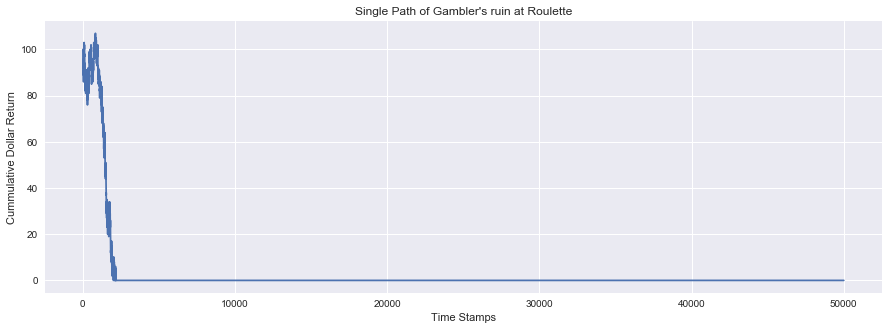

In [5]:
plt.figure(figsize=(15,5))
plt.xlabel('Time Stamps')
plt.ylabel('Cummulative Dollar Return')
plt.title("Single Path of Gambler's ruin at Roulette")

# generates 50000 uniforms to determine when the player wins or loses
a = np.random.uniform(low=0.0,high=1.0,size=size)
# generates cummulative sum, after defining points where we increment by 1 or lose money by 1
sample = np.cumsum(np.insert(np.where(a < success, 1, -1),0,100))
plt.plot(np.where(sample < 0, 0, sample))

#### (b) Use the above to estimate the probability of reaching 200 before 0 on a sample of 10,000 paths if you start with 100.

In [11]:
hit_2b1 = 0

for _ in range(10_000):
    # generate path of the simulation, starting at 100
    a = np.random.uniform(low=0.0,high=1.0,size=size)
    v = np.cumsum(np.insert(np.where(a < success, 1, -1),0,100))
    temp = v[1:]  # checks to see the sequence after starting 
    
    # check to see if the path reaches 200 at anytime after first step 
    a1 = np.argwhere(temp==200)
    
    # if 200 is reached we check to see the position of the occurence 
    if (a1.size > 0):
        a2 = np.argwhere(temp==0)
        # check to see if the index position of 200 occurs before 0, if so add to the counter
        if (a1[0][0] < a2[0][0]):
            hit_2b1 += 1
print("===========================================================================")    
print("The probability of hitting 200 before 0 is {}".format(hit_2b1/10000))
print("===========================================================================")  

The probability of hitting 200 before 0 is 0.0


#### (C) Repeat the above on a sample of 100,000 paths.

In [16]:
hit_2b2 = 0

for _ in range(100_000):
    # generate cummulative sum of the simulation, starting at 100
    a = np.random.uniform(low=0.0,high=1.0,size=size)
    v = np.cumsum(np.insert(np.where(a < success, 1, -1),0,100))
    temp = v[1:]  # checks to see the sequence after starting 
    
    # check to see if the path reaches 200
    a1 = np.argwhere(temp==200)
    
    if (a1.size > 0):
        a2 = np.argwhere(temp==0)
        # check to see if the index position of 200 occurs before 0, if so add to the counter
        if (a1[0][0] < a2[0][0]):
            hit_2b2 += 1
print("===========================================================================")      
print("The probability of hitting 200 before 0 is {}".format(hit_2b2/100000))
print("===========================================================================")  

The probability of hitting 200 before 0 is 2e-05


#### (d) Repeat Question b) with starting fortune 80, 90? 

In [13]:
hit_2b3 = 0

for _ in range(10_000):
    # generate cummulative sum of the simulation, starting at 80
    a = np.random.uniform(low=0.0,high=1.0,size=size)
    v = np.cumsum(np.insert(np.where(a < success, 1, -1),0,180))
    temp = v[1:]  # checks to see the sequence after starting 
    
    # check to see if the path reaches 200
    a1 = np.argwhere(temp==200)
    
    if (a1.size > 0):
        a2 = np.argwhere(temp==0)
        # check to see if the index position of 200 occurs before 0, if so add to the counter
        if (a1[0][0] < a2[0][0]):
            hit_2b3 += 1
print("===========================================================================")  
print("The probability of hitting 200 before 0 starting at 180 is {}".format(hit_2b3/10000))
print("===========================================================================")  

The probability of hitting 200 before 0 starting at 180 is 0.1209


In [14]:
hit_2b4 = 0

for _ in range(10_000):
    # generate cummulative sum of the simulation, starting at 90
    a = np.random.uniform(low=0.0,high=1.0,size=size)
    v = np.cumsum(np.insert(np.where(a < success, 1, -1),0,190))
    temp = v[1:]  # checks to see the sequence after starting 
    
    # check to see if the path reaches 200
    a1 = np.argwhere(temp==200)
    
    if (a1.size > 0):
        a2 = np.argwhere(temp==0)
        # check to see if the index position of 200 occurs before 100, if so add to the counter
        if (a1[0][0] < a2[0][0]):
            hit_2b4 += 1
print("===========================================================================")      
print("The probability of hitting 200 before 0 starting at 190 is {}".format(hit_2b4/10000))
print("===========================================================================")  

The probability of hitting 200 before 0 starting at 190 is 0.3483


#### What is your guess for the starting amount that gives equal probability 1/2 to reach 200 and 0?

Given the vast number of simulations required before we were able to simply arrive at 200, in order to achieve equal probaility of making 200 or going bust we would need to start at a value relatively close to 200, e.g., 194, 195. I have provided a simulation below to illustrate this hypothesis, with the correct starting amount being $\approx$194, to arrive with equal probability of reaching 200 or 0. 

In [15]:
hit_equal = 0
starting = 194

for X in range(1, 100_001):
    # generate cummulative sum of the simulation, starting at 90
    a = np.random.uniform(low=0.0,high=1.0,size=size)
    v = np.cumsum(np.insert(np.where(a < success, 1, -1),0,starting))
    temp = v[1:]  # checks to see the sequence after starting 
    
    # check to see if the path reaches 200
    a1 = np.argwhere(temp==200)
    
    if (a1.size > 0):
        a2 = np.argwhere(temp==0)
        # check to see if the index position of 200 occurs before going bust, if so add to the counter
        if (a1[0][0] < a2[0][0]):
            hit_equal += 1
            
    if (X%10000 == 0):
        print('..... at {} simulation(s) 200 has been hit exactly {}'.format(X, hit_equal))
        
print("-----------------------------------------------------------------------------------")    
print("The probability of hitting 200 before going bust, starting at {} is {}".format(starting, hit_equal/100_000))

..... at 10000 simulation(s) 200 has been hit exactly 5277
..... at 20000 simulation(s) 200 has been hit exactly 10555
..... at 30000 simulation(s) 200 has been hit exactly 15864
..... at 40000 simulation(s) 200 has been hit exactly 21201
..... at 50000 simulation(s) 200 has been hit exactly 26494
..... at 60000 simulation(s) 200 has been hit exactly 31735
..... at 70000 simulation(s) 200 has been hit exactly 37125
..... at 80000 simulation(s) 200 has been hit exactly 42435
..... at 90000 simulation(s) 200 has been hit exactly 47747
..... at 100000 simulation(s) 200 has been hit exactly 53029
-----------------------------------------------------------------------------------
The probability of hitting 200 before going bust, starting at 194 is 0.53029
